# Using YOLO-V8 Model
---

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 11.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
!nvidia-smi

Tue May 21 11:22:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Modules to be imported

---




In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

## Importing Dataset
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To Download the dataset and extract all the files
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d pkdarabi/bone-fracture-detection-computer-vision-project -p /content/drive/MyDrive/BoneFractureDataset

In [ ]:
dataset_path = "/content/drive/MyDrive/BoneFractureDataset"
with zipfile.ZipFile(os.path.join(dataset_path , 'bone-fracture-detection-computer-vision-project.zip') , 'r') as zip_file:
  zip_file.extractall(dataset_path)

## Training YOLO Model
---

In [ ]:
train_model = YOLO('yolov8m.pt')
train_model.train(data = '/content/drive/MyDrive/BoneFractureDataset/data.yaml' , epochs = 50 , imgsz = 256 , device = 'cuda')

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/BoneFractureDataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /content/drive/MyDrive/BoneFractureDataset/train/labels.cache... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/BoneFractureDataset/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.755G      3.402      5.153      1.987         20        256: 100%|██████████| 227/227 [02:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.41it/s]

                   all        348        204      0.175     0.0152    0.00834    0.00286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.774G      2.991      4.095      1.698         13        256: 100%|██████████| 227/227 [00:56<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.99it/s]

                   all        348        204      0.548     0.0428     0.0226    0.00643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.765G      2.909      3.652      1.708          8        256: 100%|██████████| 227/227 [00:57<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.54it/s]

                   all        348        204      0.403      0.111      0.057     0.0179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.765G      2.857      3.557      1.641         21        256: 100%|██████████| 227/227 [00:56<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.42it/s]


                   all        348        204      0.187     0.0865     0.0296     0.0112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.765G      2.771      3.283       1.61         24        256: 100%|██████████| 227/227 [00:56<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.14it/s]

                   all        348        204      0.113       0.12     0.0725     0.0207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.763G      2.728      3.139      1.573         13        256: 100%|██████████| 227/227 [00:56<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.13it/s]


                   all        348        204       0.17      0.153      0.106     0.0365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.763G      2.674      2.998       1.56         23        256: 100%|██████████| 227/227 [00:57<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]

                   all        348        204      0.302      0.165      0.116     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.763G      2.671       2.99      1.553         12        256: 100%|██████████| 227/227 [00:55<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.99it/s]

                   all        348        204      0.155      0.153      0.105     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.763G      2.618      2.869      1.536         20        256: 100%|██████████| 227/227 [00:57<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.26it/s]


                   all        348        204       0.18       0.15      0.124     0.0423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.763G      2.565       2.77      1.504         19        256: 100%|██████████| 227/227 [00:57<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.08it/s]

                   all        348        204      0.185      0.135      0.125     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.763G       2.53      2.737      1.481          7        256: 100%|██████████| 227/227 [00:56<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.14it/s]

                   all        348        204      0.238      0.166      0.161     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.768G      2.503      2.668       1.47         13        256: 100%|██████████| 227/227 [00:56<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.27it/s]


                   all        348        204       0.26      0.217      0.153     0.0585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.763G      2.473      2.537      1.469         11        256: 100%|██████████| 227/227 [00:56<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.30it/s]

                   all        348        204      0.176      0.231      0.165     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.763G       2.42      2.492      1.439         16        256: 100%|██████████| 227/227 [00:55<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]

                   all        348        204      0.259      0.257      0.198     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.763G      2.381       2.51      1.437         13        256: 100%|██████████| 227/227 [00:54<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        348        204      0.247      0.188      0.175     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.763G      2.368      2.434      1.429         15        256: 100%|██████████| 227/227 [00:54<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        348        204       0.45      0.158      0.171     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.763G      2.385      2.373      1.421         17        256: 100%|██████████| 227/227 [00:55<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.76it/s]

                   all        348        204      0.277      0.271      0.214     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.763G      2.331      2.352       1.41         10        256: 100%|██████████| 227/227 [00:55<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        348        204      0.292      0.168      0.179     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.765G      2.264      2.278      1.387         17        256: 100%|██████████| 227/227 [00:54<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        348        204      0.323      0.203      0.193     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.763G      2.326      2.282      1.393         21        256: 100%|██████████| 227/227 [00:53<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        348        204      0.239      0.256      0.193     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.763G       2.29      2.198      1.377         13        256: 100%|██████████| 227/227 [00:54<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        348        204      0.293      0.281      0.216     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.763G      2.211      2.144      1.356         18        256: 100%|██████████| 227/227 [00:54<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        348        204       0.28      0.292      0.211     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.763G      2.218      2.189      1.342         13        256: 100%|██████████| 227/227 [00:54<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        348        204      0.301      0.277      0.245     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.765G      2.205      2.119      1.363         19        256: 100%|██████████| 227/227 [00:54<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.26it/s]

                   all        348        204      0.292      0.279      0.209     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.763G      2.193      2.077      1.344         14        256: 100%|██████████| 227/227 [00:56<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.71it/s]

                   all        348        204      0.384      0.262      0.234     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.763G      2.132      2.044      1.324         10        256: 100%|██████████| 227/227 [00:56<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]

                   all        348        204      0.379      0.204      0.229     0.0798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.763G      2.125      1.969      1.322         17        256: 100%|██████████| 227/227 [00:56<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.55it/s]

                   all        348        204       0.26      0.308       0.24       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.763G      2.144      1.959      1.322         11        256: 100%|██████████| 227/227 [00:56<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.05it/s]


                   all        348        204      0.322      0.287      0.233     0.0762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.763G      2.121      1.925      1.303         11        256: 100%|██████████| 227/227 [00:57<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.08it/s]

                   all        348        204      0.342      0.217      0.212     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.763G      2.107      1.896      1.308          8        256: 100%|██████████| 227/227 [00:57<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.11it/s]

                   all        348        204      0.266      0.273      0.215     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.763G      2.082      1.877      1.302         12        256: 100%|██████████| 227/227 [00:57<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.37it/s]

                   all        348        204      0.299      0.212      0.195     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.763G      2.066      1.827      1.289         14        256: 100%|██████████| 227/227 [00:57<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]


                   all        348        204      0.311      0.253      0.237     0.0762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.763G       2.04      1.824       1.28         16        256: 100%|██████████| 227/227 [00:57<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.17it/s]


                   all        348        204      0.278       0.28      0.248     0.0854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.763G      2.013      1.737      1.271         17        256: 100%|██████████| 227/227 [00:57<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.20it/s]

                   all        348        204      0.334      0.255      0.238     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.763G       1.99      1.736      1.265         18        256: 100%|██████████| 227/227 [00:56<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]

                   all        348        204      0.273      0.262      0.214     0.0701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.763G      1.976      1.719      1.245         13        256: 100%|██████████| 227/227 [00:57<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.34it/s]

                   all        348        204      0.284      0.253      0.211     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.763G      1.957      1.683      1.245         15        256: 100%|██████████| 227/227 [00:55<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]

                   all        348        204      0.302       0.26      0.239     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.763G       1.93      1.644      1.238         15        256: 100%|██████████| 227/227 [00:56<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.98it/s]

                   all        348        204      0.307      0.244      0.221     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.763G      1.928      1.644      1.226         17        256: 100%|██████████| 227/227 [00:54<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.50it/s]

                   all        348        204      0.284      0.267      0.217     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.765G      1.914      1.608      1.216         22        256: 100%|██████████| 227/227 [00:54<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        348        204      0.292      0.242      0.221     0.0748


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.763G      1.865      1.518      1.267          9        256: 100%|██████████| 227/227 [00:51<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        348        204      0.254      0.265      0.213     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.763G      1.792      1.431      1.231          9        256: 100%|██████████| 227/227 [00:51<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.43it/s]

                   all        348        204       0.26      0.251       0.21     0.0701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.763G      1.791      1.394       1.22          8        256: 100%|██████████| 227/227 [00:54<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.58it/s]

                   all        348        204      0.263      0.283      0.214     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.763G      1.761      1.382      1.208          6        256: 100%|██████████| 227/227 [00:56<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.52it/s]

                   all        348        204      0.306      0.226      0.213      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.763G      1.743      1.331        1.2          8        256: 100%|██████████| 227/227 [00:55<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.65it/s]

                   all        348        204      0.286      0.256      0.222      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.763G      1.716      1.325      1.197          7        256: 100%|██████████| 227/227 [00:54<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.26it/s]

                   all        348        204      0.304      0.254      0.224     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.763G      1.698      1.282      1.181          8        256: 100%|██████████| 227/227 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]

                   all        348        204      0.265      0.258       0.21     0.0711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.763G      1.682      1.272      1.175         14        256: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.93it/s]

                   all        348        204      0.326      0.265      0.225     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.763G      1.657      1.248      1.163         11        256: 100%|██████████| 227/227 [00:52<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.28it/s]

                   all        348        204      0.308      0.257      0.224     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.763G      1.636      1.242      1.154          7        256: 100%|██████████| 227/227 [00:52<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.50it/s]

                   all        348        204      0.336      0.239      0.217     0.0736



50 epochs completed in 0.862 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.34it/s]


                   all        348        204      0.278       0.28      0.248     0.0847
        elbow positive        348         29     0.0614     0.0345     0.0294    0.00742
      fingers positive        348         48       0.39      0.229      0.245     0.0645
      forearm fracture        348         43      0.446      0.488      0.485       0.17
               humerus        348         36      0.528      0.556      0.556      0.214
     shoulder fracture        348         20      0.164        0.3       0.15      0.046
        wrist positive        348         28     0.0756     0.0714     0.0246    0.00657
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4e67c83250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

## Testing the trained Model
---

In [ ]:
model = YOLO('/content/drive/MyDrive/BoneFractureDataset/best_model.pt')

In [ ]:
test = os.listdir('/content/drive/MyDrive/BoneFractureDataset/test/images')
test = [os.path.join('/content/drive/MyDrive/BoneFractureDataset/test/images' , path) for path in test]
results = model.predict(test)


0: 256x256 (no detections), 59.6ms
1: 256x256 (no detections), 59.6ms
2: 256x256 1 humerus, 59.6ms
3: 256x256 (no detections), 59.6ms
4: 256x256 (no detections), 59.6ms
5: 256x256 (no detections), 59.6ms
6: 256x256 2 humeruss, 59.6ms
7: 256x256 1 wrist positive, 59.6ms
8: 256x256 (no detections), 59.6ms
9: 256x256 (no detections), 59.6ms
10: 256x256 2 humeruss, 59.6ms
11: 256x256 (no detections), 59.6ms
12: 256x256 1 forearm fracture, 59.6ms
13: 256x256 (no detections), 59.6ms
14: 256x256 (no detections), 59.6ms
15: 256x256 1 humerus, 59.6ms
16: 256x256 (no detections), 59.6ms
17: 256x256 1 elbow positive, 59.6ms
18: 256x256 (no detections), 59.6ms
19: 256x256 (no detections), 59.6ms
20: 256x256 (no detections), 59.6ms
21: 256x256 (no detections), 59.6ms
22: 256x256 (no detections), 59.6ms
23: 256x256 (no detections), 59.6ms
24: 256x256 (no detections), 59.6ms
25: 256x256 (no detections), 59.6ms
26: 256x256 (no detections), 59.6ms
27: 256x256 1 humerus, 59.6ms
28: 256x256 (no detectio

In [ ]:
results[2].boxes # You can get the dimensions of the box and also the class index

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4.])
conf: tensor([0.5513])
data: tensor([[334.8836, 186.0790, 447.9932, 343.2594,   0.5513,   4.0000]])
id: None
is_track: False
orig_shape: (420, 512)
shape: torch.Size([1, 6])
xywh: tensor([[391.4384, 264.6692, 113.1096, 157.1804]])
xywhn: tensor([[0.7645, 0.6302, 0.2209, 0.3742]])
xyxy: tensor([[334.8836, 186.0790, 447.9932, 343.2594]])
xyxyn: tensor([[0.6541, 0.4430, 0.8750, 0.8173]])

In [ ]:
idx = 10
try:
  boxes = list(map(int, results[idx].boxes.xywh[0]))
  class_index = int(results[idx].boxes.cls[0])
  class_name = results[idx].names[class_index]
except IndexError:
  print("No Fracture Detected !!")

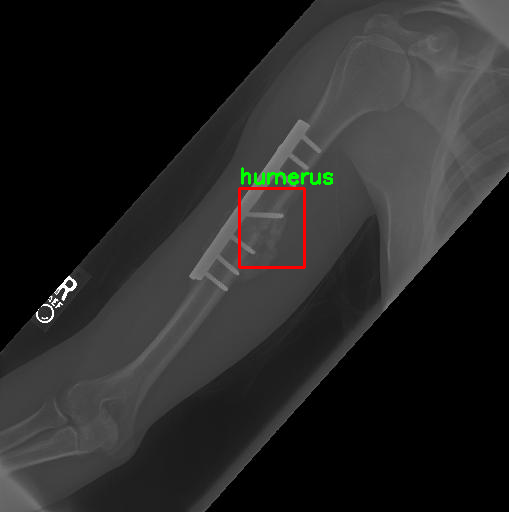

In [ ]:
from google.colab.patches import cv2_imshow
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.7
font_thickness = 2

img = cv2.imread(test[idx])
cv2.rectangle(img, (x-w//2, y-h//2), ((x-w//2)+ w ,(y-h//2)+ h), (0, 0, 255),2)
cv2.putText(img , class_name , (x-w//2, y-h//2-5) , font , font_scale ,(0, 255, 0), font_thickness)
cv2_imshow(img)